In [41]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from classes.indicators.MomentumIndicators import RSI

In [96]:
df = yf.download("NFLX", period="2y", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [97]:
df['MA50'] = df['Adj Close'].rolling(window=50).mean()
df['MA20'] = df['Adj Close'].rolling(window=20).mean()

In [98]:
def sdma_compute(ma20, ma50):
    return np.sqrt((ma20 - ma50) ** 2)


df.dropna(inplace=True)
df['RSI'] = RSI(df['Close']).get_rsi()
df['sdma'] = np.vectorize(sdma_compute)(df['MA20'], df['MA50'])
df["nsdma"] = (df['sdma'] - np.min(df['sdma'])) / (np.max(df['sdma']) - np.min(df['sdma']))


In [99]:
def nsdma_signal(nsdma, rsi, ma20, ma50):
    if (nsdma < 0.5) and (rsi < 40) and (ma20 > ma50):
        return True
    return False

In [100]:
df['nsdma_signal'] = np.vectorize(nsdma_signal)(df['nsdma'], df['RSI'], df['MA20'], df['MA50'])
signals = df[df['nsdma_signal']]

/home/rickturner/screening101/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in nsdma_signal (vectorized)
  outputs = ufunc(*inputs)


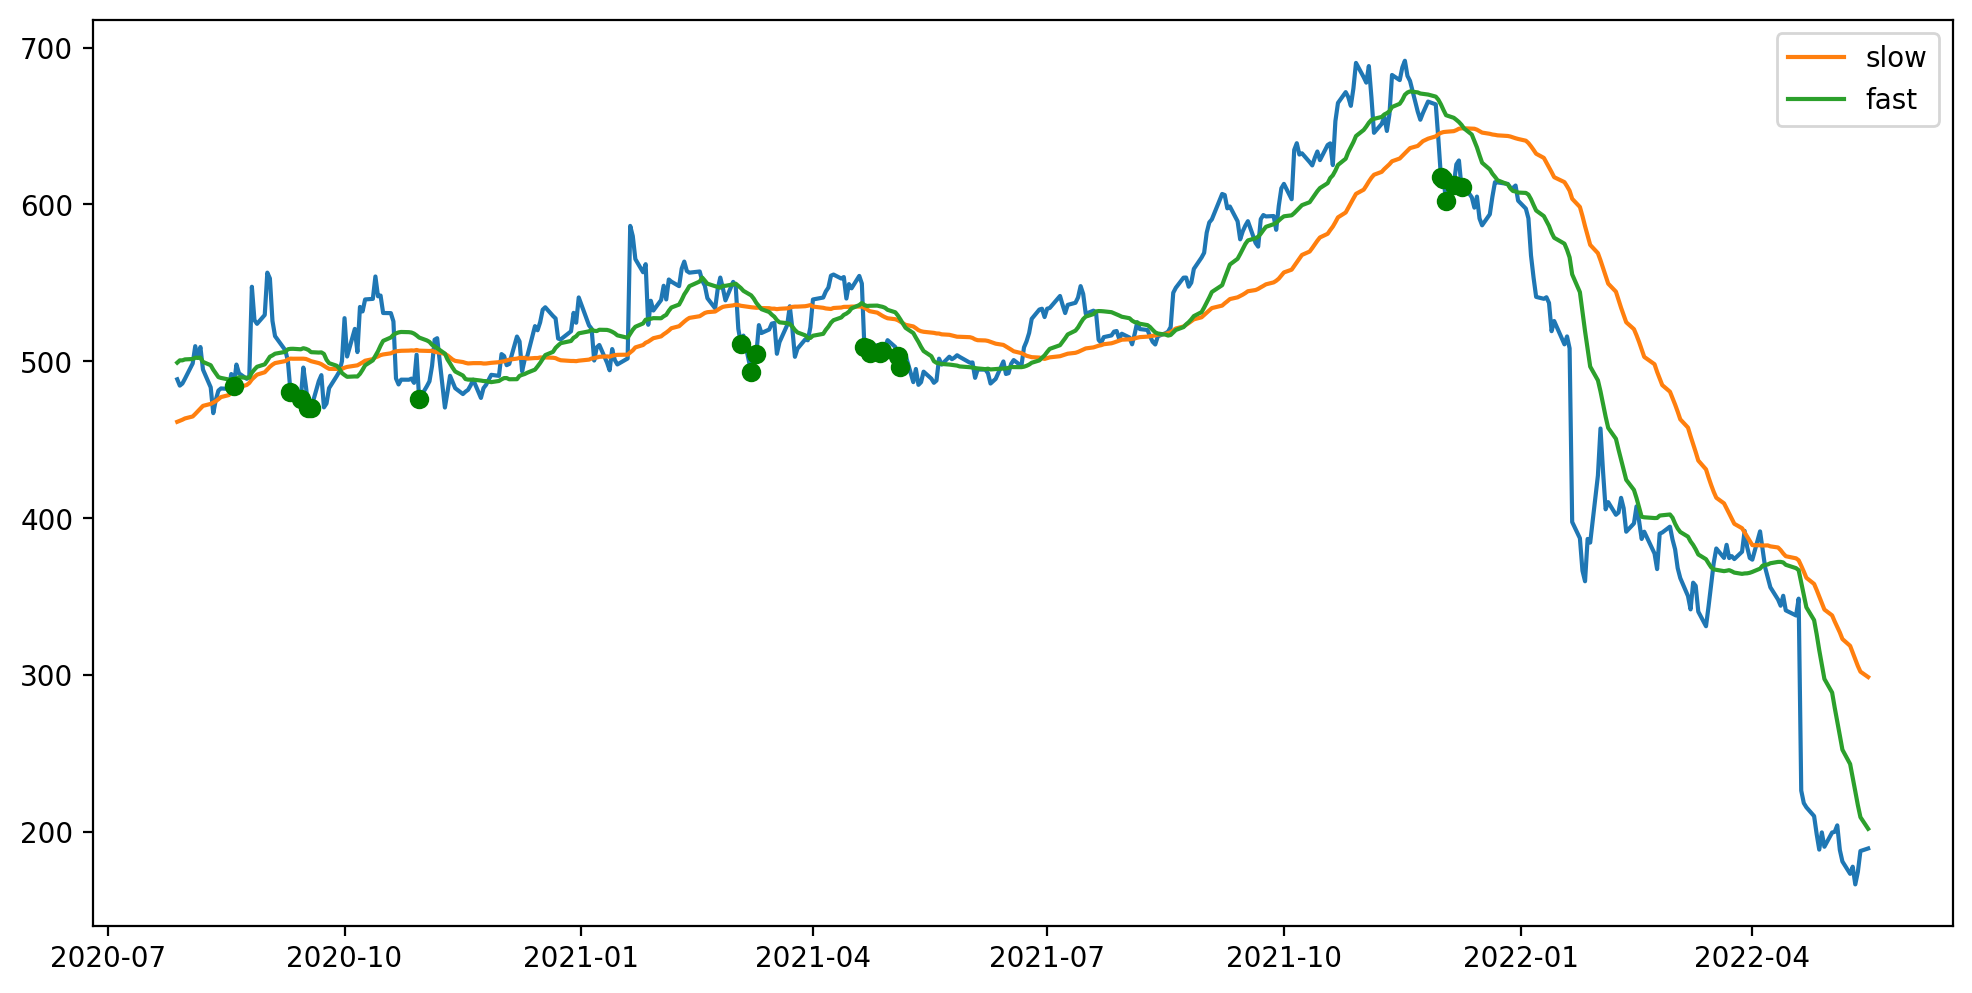

In [101]:
plt.figure(figsize=(12, 6), dpi=200)

plt.plot(df.index, df['Close'])
plt.plot(df.index, df['MA50'], label="slow")
plt.plot(df.index, df['MA20'], label="fast")
for date in signals.index:
    plt.plot(date, df.loc[date]['Close'], marker="o", c='g')

plt.legend()